<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2019


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Machine learning: brief introduction </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 11, 2019 </b></p>

<hr style='height:5px;border:none' />

# 0. What is machine learning?
<hr style="height:1px;border:none" />

The main goal of **machine learning** is to build (*or to* ***learn***) a predictive model based on available data. Although machine learning is built upon statistical concept, it is different from traditional statistics, where inference and estimation are performed based on known statistical distributions. 

Machine learning is a data-driven approach. Some machine learning methods may work well for some data, but may not work well for other types of data. There is no machine learning method that works well for any data. People usually have to choose a machine learning method that works well for their data (often via trails and errors).

## Supervised v.s. unsupervised learning

In machine learning, a data set consists of **features**, or variables used to make predictions. A data set may also contain the **labels**, the true group assignments or classes. The goal of **supervised learning** is to train a model to predict labels based on the available features. **Classification**, or assignment of observations into distinct categories, is a popular example of supervised learning. 

Supervised learning models are often constructed -- *learned or* ***trained*** -- using a portion of a data set, known as the **training data**. The resulting model is validated using the remaining portion of the data set known as the **testing data**. This framework is necessary to avoid **overfitting**, where the model can predict the training data very accurately but unable to predict on new data sets.

Unlike supervised learning, true labels may not be available for **unsupervised learning**. The goal of unsupervised learning is to find patterns in the data (often without labels). **Clustering**, or finding natural grouping of observations with similar features, is one example of unsupervised learning. **Dimension reduction**, or describing a large number of features with a small number of summary features, is another 

## Glossary of machine learning

Just FYI, there is a glossary of machine learning terms available from Google's [machine learning tutorial](https://developers.google.com/machine-learning/glossary). 


# 1. Simple clustering example
<hr style="height:1px;border:none" />

Now let's take a look at a simple example of clustering. The goal of clustering is to identify grouping of observations based on similarities in features. In this example, we will use **K-means** clustering method.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in **Scikit-learn** (or **`sklearn`**, a popular machine learning library in Python). The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. 

[`<IrisCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisCluster.py)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
nVar = X.shape[1]  # number of features


In [ ]:
%matplotlib inline

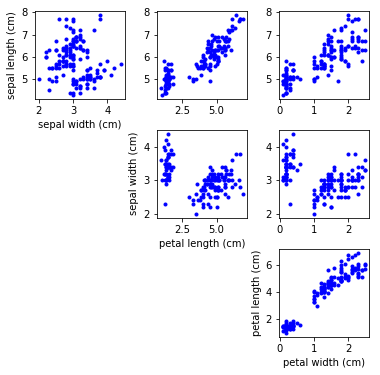

In [5]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        plt.plot(X[:,iCol], X[:,iRow], 'b.')
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()


## Clustering
For this example, we use the **K-means clustering** method. The K-means clustering splits the data into **K** clusters of similar sizes. This algorithm starts by choosing **K** centroids in the feature space, defining the centers of **K** clusters. Then it assigns each observation to a cluster by minimizing the distance between the observation and a centroid. 

K-means clustering is available in **`sklearn.cluster`** as a transformation object **`KMeans`**. Here, the number of clusters **`n_clusters`** is a *required* parameter. We can use the **`.fit()`** method to fit the data, and cluster assignments can be found as the attribute **`.labels_`**. The coordinates for the centroids can be found as the attribute **`.cluster_centers_`**. 

In [6]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates


Now, let's see how well the K-means algorithm worked.

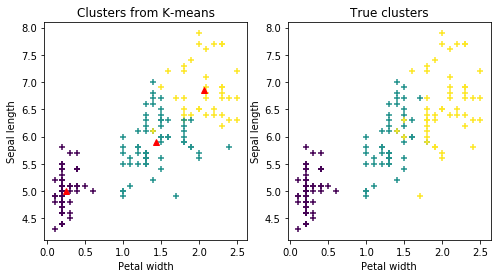

In [7]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()


## Normalizing the data